In [1]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

In [2]:
arr = np.array([[1,2,np.nan],[np.nan,3,4]])
dframe1 = DataFrame(arr,index=['A','B'],columns = ['One','Two','Three'])
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [3]:
dframe1.sum(axis=1) # remove the axis for column summary

A    3.0
B    7.0
dtype: float64

In [6]:
dframe1.min() # ignores NaN

One      1.0
Two      2.0
Three    4.0
dtype: float64

In [7]:
dframe1.idxmin() # gives index min

One      A
Two      A
Three    B
dtype: object

In [8]:
#A very useful feature is describe, which provides summary statistics
dframe1.describe()

,One,Two,Three
count,1.0,2.000000,1.0
mean,1.0,2.500000,4.0
std,NaN,0.707107,NaN
min,1.0,2.000000,4.0
25%,1.0,2.250000,4.0
50%,1.0,2.500000,4.0
75%,1.0,2.750000,4.0
max,1.0,3.000000,4.0


In [32]:
#Pandas can get info off the web
from pandas_datareader.data import DataReader
import fix_yahoo_finance

In [43]:
yf.pdr_override()
# 
stocks = ['CVX','XOM','BP']
sd ='2010-01-01'
ed ='2013-01-01'

prices = pdr.get_data_yahoo(stocks, start=sd, end=ed)['Adj Close']
# #Show preview
prices.head()

[*********************100%***********************]  3 of 3 downloaded


,BP,CVX,XOM
Date,,,
2010-01-04,38.985382,58.274067,54.068806
2010-01-05,39.262192,58.686859,54.279911
2010-01-06,39.466515,58.694206,54.749065
2010-01-07,39.453335,58.473091,54.577042
2010-01-08,39.545601,58.576275,54.358116


In [44]:
volume = pdr.get_data_yahoo(stocks, 
                               start=sd, 
                               end=ed)['Volume']

#Show preview
volume.head()

[*********************100%***********************]  3 of 3 downloaded


,BP,CVX,XOM
Date,,,
2010-01-04,3956100.0,10173800.0,27809100.0
2010-01-05,4109600.0,10593700.0,30174700.0
2010-01-06,6227900.0,11014600.0,35044700.0
2010-01-07,4431300.0,9626900.0,27192100.0
2010-01-08,3786100.0,5624300.0,24891800.0


In [54]:
# percent change over given number of periods {periods=1, fill_method='pad', limit=None, freq=None}
rets = prices.pct_change()
rets.head()

,BP,CVX,XOM
Date,,,
2010-01-04,NaN,NaN,NaN
2010-01-05,0.007100,0.007084,0.003904
2010-01-06,0.005204,0.000125,0.008643
2010-01-07,-0.000334,-0.003767,-0.003142
2010-01-08,0.002339,0.001765,-0.004011


In [58]:
corr = rets.corr

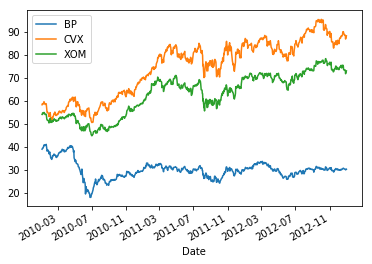

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

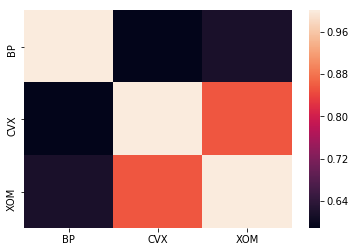

In [64]:
sns.heatmap(rets.corr())

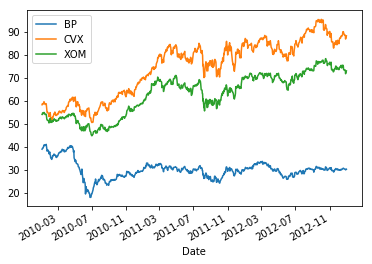

In [66]:
prices.plot()

# Removing Duplicates

In [67]:
dframe = DataFrame({'key1': ['A'] * 2 + ['B'] * 3,
                  'key2': [2, 2, 2, 3, 3]})
dframe

,key1,key2
0,A,2
1,A,2
2,B,2
3,B,3
4,B,3


In [75]:
#We can find duplicates
dframe.duplicated()

0    False
1     True
2    False
3    False
4     True
dtype: bool

In [69]:
# We can also drop duplicates like this:
dframe.drop_duplicates()

,key1,key2
0,A,2
2,B,2
3,B,3


In [74]:

#By default the first value was taken for the duplicates, we can also take the last value instead
dframe.drop_duplicates(['key1'],keep='last')

,key1,key2
1,A,2
4,B,3


# Outliers

In [77]:
# First we'll seed the numpy generator
np.random.seed(12345)

#Next we'll create the dataframe
dframe = DataFrame(np.random.randn(1000,4))
dframe.head()

,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570


In [78]:
dframe.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [79]:
# Lets select the first column
col = dframe[0]
# NOw we can check which values in the column are greater than 3, for instance.
col[np.abs(col)>3]

523   -3.428254
900    3.366626
Name: 0, dtype: float64

In [80]:
# So we now know in column[0], rows 523 and 900 have values with abs > 3. How about all the columns?
# We can use the "any" method
dframe[(np.abs(dframe)>3).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [82]:
# WE could also possibly cap the data at 3

dframe[np.abs(dframe)>3] = np.sign(dframe) *3

In [83]:
dframe.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


# Data agregation

Data Agrregation consists of operations that result in a scalar (e.g. mean(),sum(),count(), etc)

In [88]:
#Let's get a csv data set to play with
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'


# Save thewinquality.csv file in the same folder as your ipython notebooks, note the delimiter used ;
dframe_wine = pd.read_csv('winequality-red.csv',sep=';')
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [89]:
dframe_wine['alcohol'].mean()

10.422983114446529

In [92]:
wino = dframe_wine.groupby('quality')
wino.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [93]:
# custom function
def max_to_min(arr):
    return arr.max() - arr.min()
wino.agg(max_to_min)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [95]:
# Let's adda  quality to alcohol content ratio
dframe_wine['qual/alc ratio'] = dframe_wine['quality']/dframe_wine['alcohol']
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


In [96]:
# WE can also use pivot tables instead of groupby
# Pivot table of quality
dframe_wine.pivot_table(index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


In [97]:
# Create a function that assigns a rank to each wine based on alcohol content, with 1 being the highest alcohol content
def ranker(df):
    df['alc_content_rank'] = np.arange(len(df)) + 1
    return df

In [102]:
# Now sort the dframe by alcohol in ascending order
dframe_wine.reset_index()

dframe_wine.sort_values('alcohol',ascending=False,inplace=True)
# Now we'll group by quality and apply our ranking function
dframe_wine = dframe_wine.groupby('quality').apply(ranker)
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,0.335570,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,0.571429,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571,1
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571,2
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,0.428571,3


In [105]:
# Get the numebr of quality counts
num_of_qual = dframe_wine['quality'].value_counts()

#Show
num_of_qual
# Now we'll show the combined info for teh wines that had the highest alcohol content for their respective rank!
dframe_wine[dframe_wine.alc_content_rank == 1].head(len(num_of_qual))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,0.335570,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,0.571429,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571,1
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,0.500000,1
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,0.305344,1
899,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0.272727,1


# Cross Tabulation

In [109]:
# Let's create a quick data set
from io import StringIO

data ="""\
Sample   Animal   Intelligence
1        Dog     Smart
2 Dog Smart
3 Cat Dumb
4 Cat Dumb
5 Dog Dumb
6 Cat Smart"""

#Store as dframe
dframe = pd.read_table(StringIO(data),sep='\s+')
dframe

,Sample,Animal,Intelligence
0,1,Dog,Smart
1,2,Dog,Smart
2,3,Cat,Dumb
3,4,Cat,Dumb
4,5,Dog,Dumb
5,6,Cat,Smart


In [110]:
# create a cross-tabulation table, which is basically just a frequency table
pd.crosstab(dframe.Animal,dframe.Intelligence,margins=True)

Intelligence,Dumb,Smart,All
Animal,,,
Cat,2,1,3
Dog,1,2,3
All,3,3,6
